In [1]:
from ultralytics import YOLO, settings

# settings.reset()

model = YOLO("yolo11n.pt")

In [2]:
if "bicycle" in model.names.values():
    print("yeah")

yeah


In [6]:
#clean up

from pathlib import Path
from shutil import rmtree

path = Path("content/results")
rmtree(path)
path.mkdir()

path = Path("runs")
if path.exists():
    rmtree(path)


In [27]:
import shutil
import os
from pathlib import Path

# os.chdir(Path(os.path.abspath("")).parent)
# print(os.getcwd())
# os.chdir("./content")
# for file in Path("content/testinputs/similarity/2").iterdir():
for file in Path("content/testinputs/similarity/3/multiple").iterdir():
    print(file.name)
    results = model.predict(file, save=True, save_crop=True)
    # results[0].save(f"content/results/{file.name}")

IMG_4353.JPEG

image 1/1 /Users/dynamiteopanty/Documents/Programming/bunkyo/2025proDE/content/testinputs/similarity/3/multiple/IMG_4353.JPEG: 640x480 3 bicycles, 78.7ms
Speed: 6.5ms preprocess, 78.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /Users/dynamiteopanty/Documents/Programming/bunkyo/2025proDE/runs/detect/predict
IMG_4352.JPEG

image 1/1 /Users/dynamiteopanty/Documents/Programming/bunkyo/2025proDE/content/testinputs/similarity/3/multiple/IMG_4352.JPEG: 640x480 2 bicycles, 54.8ms
Speed: 1.9ms preprocess, 54.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /Users/dynamiteopanty/Documents/Programming/bunkyo/2025proDE/runs/detect/predict
IMG_4355.JPEG

image 1/1 /Users/dynamiteopanty/Documents/Programming/bunkyo/2025proDE/content/testinputs/similarity/3/multiple/IMG_4355.JPEG: 640x480 3 bicycles, 60.3ms
Speed: 1.8ms preprocess, 60.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)
Result

In [33]:
# similarity check, by color

# https://qiita.com/best_not_best/items/c9497ffb5240622ede01

from pathlib import Path
from cv2 import imread, resize, calcHist, compareHist
from cv2.typing import MatLike

IMGSIZE = (200, 200)

img1: MatLike = imread(Path("content/testinputs/similarity/IMG_1238.jpg"))
img1 = resize(img1, IMGSIZE)
img1_hist = calcHist([img1], [0], None, [256], [0, 256])

results: list[dict] = []
for file in Path("runs/detect/predict/crops/bicycle/").iterdir():
    img2: MatLike = imread(file)
    img2 = resize(img2, IMGSIZE)
    img2_hist = calcHist([img2], [0], None, [256], [0, 256])
    ret = compareHist(img1_hist, img2_hist, 0)
    results.append([file.name, ret])

sortedresult = sorted(results, key=lambda result: result[0])
for result in sortedresult:
    print(result[0], result[1])

IMG_4342.jpg 0.0024358485959231507
IMG_43422.jpg 0.0024358485959231507
IMG_4343.jpg 0.09603961291977818
IMG_43432.jpg 0.09603961291977818
IMG_4344.jpg -0.08633323700233504
IMG_43442.jpg -0.08633323700233504
IMG_4345.jpg 0.14089023389995223
IMG_43452.jpg 0.14089023389995223
IMG_4346.jpg 0.1223989306712109
IMG_43462.jpg -0.2089381129302035
IMG_43463.jpg 0.10374264888449058
IMG_43464.jpg 0.039318161900297376
IMG_43465.jpg 0.1223989306712109
IMG_43466.jpg -0.2089381129302035
IMG_43467.jpg 0.10374264888449058
IMG_43468.jpg 0.039318161900297376
IMG_4347.jpg -0.03939501340994334
IMG_43472.jpg 0.3380470069599111
IMG_43473.jpg 0.11801497223731613
IMG_43474.jpg 0.25246207791804687
IMG_43475.jpg -0.03939501340994334
IMG_43476.jpg 0.3380470069599111
IMG_43477.jpg 0.11801497223731613
IMG_43478.jpg 0.25246207791804687
IMG_4348.jpg 0.4805979258224692
IMG_43482.jpg 0.4805979258224692
IMG_4349.jpg 0.46122245657095867
IMG_43492.jpg 0.46122245657095867
IMG_4350.jpg 0.6000443607290751
IMG_43502.jpg 0.6000

In [32]:
# similarity check, glay scale

# https://qiita.com/best_not_best/items/c9497ffb5240622ede01

from pathlib import Path
from cv2 import (
    imread,
    resize,
    calcHist,
    compareHist,
    BFMatcher,
    AKAZE_create,
    NORM_HAMMING,
)
from cv2.typing import MatLike

IMGSIZE = (200, 200)


img1: MatLike = imread(Path("content/testinputs/similarity/IMG_1238.jpg"))
img1 = resize(img1, IMGSIZE)
img1_hist = calcHist([img1], [0], None, [256], [0, 256])

bf = BFMatcher(NORM_HAMMING)
detector = AKAZE_create()
(img1_kp, img1_des) = detector.detectAndCompute(img1, None)

results: list[dict] = []
for file in Path("runs/detect/predict/crops/bicycle/").iterdir():
    img2: MatLike = imread(file)
    img2 = resize(img2, IMGSIZE)
    (img2_kp, img2_des) = detector.detectAndCompute(img2, None)
    matches = bf.match(img1_des, img2_des)
    dist = [m.distance for m in matches]
    ret = sum(dist) / len(dist)
    results.append([file.name, ret])

sortedresult = sorted(results, key=lambda result: result[0])
for result in sortedresult:
    print(result[0], result[1])

IMG_4342.jpg 142.21875
IMG_43422.jpg 142.21875
IMG_4343.jpg 143.984375
IMG_43432.jpg 143.984375
IMG_4344.jpg 143.359375
IMG_43442.jpg 143.359375
IMG_4345.jpg 134.05729166666666
IMG_43452.jpg 134.05729166666666
IMG_4346.jpg 131.33333333333334
IMG_43462.jpg 160.38020833333334
IMG_43463.jpg 144.375
IMG_43464.jpg 184.35416666666666
IMG_43465.jpg 131.33333333333334
IMG_43466.jpg 160.38020833333334
IMG_43467.jpg 144.375
IMG_43468.jpg 184.35416666666666
IMG_4347.jpg 135.75520833333334
IMG_43472.jpg 182.55208333333334
IMG_43473.jpg 168.47916666666666
IMG_43474.jpg 146.11979166666666
IMG_43475.jpg 135.75520833333334
IMG_43476.jpg 182.55208333333334
IMG_43477.jpg 168.47916666666666
IMG_43478.jpg 146.11979166666666
IMG_4348.jpg 132.24479166666666
IMG_43482.jpg 132.24479166666666
IMG_4349.jpg 134.328125
IMG_43492.jpg 134.328125
IMG_4350.jpg 134.97395833333334
IMG_43502.jpg 134.97395833333334
IMG_4351.jpg 134.65625
IMG_43512.jpg 186.99479166666666
IMG_43513.jpg 153.03125
IMG_43514.jpg 134.65625
IMG

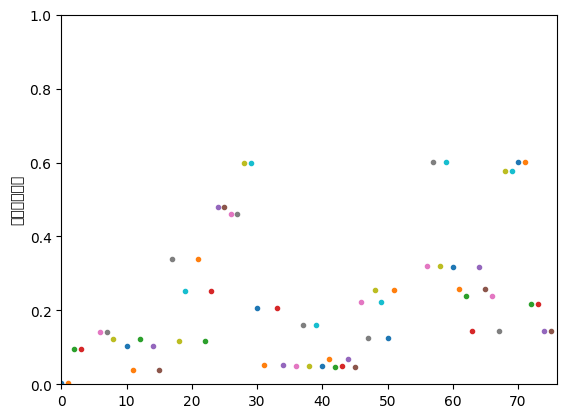

In [34]:
# graph
import matplotlib.pyplot as plt
import numpy as np

plt.ylim(0, 1)
# plt.ylim(140, 0)
# plt.ylabel("類似度")
plt.ylabel("距離")
plt.xlim(0, len(results))
plt.ylabel("インデックス")
for i, result in enumerate(sortedresult):
    plt.plot(i, result[1], marker='.')